## 딥러닝을 통한 오토인코더 이해하기

In [13]:
from keras.layers import Input, Dense
from keras.models import Model

### 설명
- input으로 mnist 28*28가 펼쳐저서 784가 들어온다.
- encode층에서는 input을 32로 feature를 줄이고
- decode층에서는 32로 축소된 feature를 다시 784로 확대한다.
- **이러면 32로 축소될 때 일부가 소실(영향력이 적은 feature)되고 복구된다.**
- **차원축소의 일부라고 보면 됨**

In [14]:
encoding_dim = 32 # 32 floats-> compression of factor 24.5, assuming the input is 784 floate.

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [15]:
'''
encoder = Model(input_img, encoded)
encoder.summary()
'''

'\nencoder = Model(input_img, encoded)\nencoder.summary()\n'

In [16]:
'''
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()
'''

'\nencoded_input = Input(shape=(encoding_dim,))\ndecoder_layer = autoencoder.layers[-1]\ndecoder = Model(encoded_input, decoder_layer(encoded_input))\ndecoder.summary()\n'

In [17]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [18]:
from keras.datasets import mnist
import numpy as np
(x_train,_),(x_test,_) = mnist.load_data()

In [19]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# np.prod곱셈. (shape - (0,1,2,3)이라면 1,2,3을 곱해라. 0은 데이터 개수 차원임)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.3687 - val_loss: 0.2723
Epoch 2/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2658 - val_loss: 0.2561
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2454 - val_loss: 0.2327
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2242 - val_loss: 0.2136
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2080 - val_loss: 0.2001
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1967 - val_loss: 0.1907
Epoch 7/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1882 - val_loss: 0.1832
Epoch 8/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1815 - val_loss: 0.1770
Epoch 9/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1759 - val_loss: 0.1719
Epoch

In [21]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

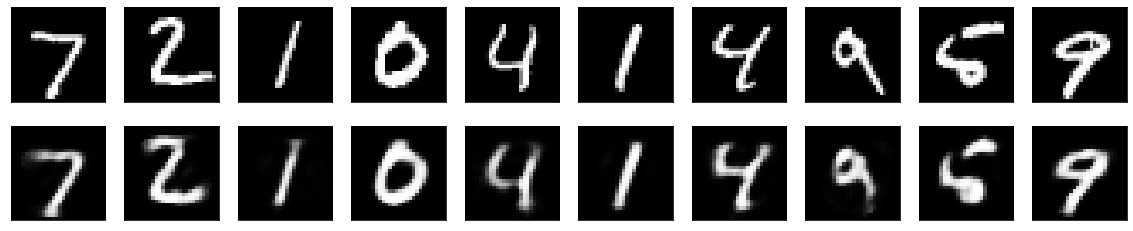

In [22]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [24]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.3385 - val_loss: 0.2642
Epoch 2/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2574 - val_loss: 0.2517
Epoch 3/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2409 - val_loss: 0.2295
Epoch 4/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2208 - val_loss: 0.2117
Epoch 5/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2068 - val_loss: 0.1973
Epoch 6/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1924 - val_loss: 0.1841
Epoch 7/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1821 - val_loss: 0.1775
Epoch 8/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1760 - val_loss: 0.1704
Epoch 9/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1705 - val_loss: 0.1

Epoch 77/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1024 - val_loss: 0.1004
Epoch 78/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1021 - val_loss: 0.1004
Epoch 79/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1021 - val_loss: 0.0999
Epoch 80/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1019 - val_loss: 0.1018
Epoch 81/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1016 - val_loss: 0.1005
Epoch 82/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1015 - val_loss: 0.1009
Epoch 83/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1014 - val_loss: 0.1017
Epoch 84/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1010 - val_loss: 0.1014
Epoch 85/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1011 - val_loss: 0.1004
Epoch 86/100
60000/60000 [===========

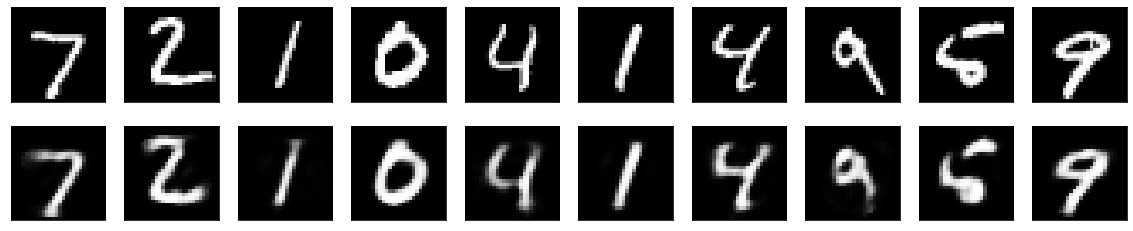

In [25]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()